# Portfolio 4 

The data for this task was taken from Kaggle. The data was fetched from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data.   




## Solution to task starts here 


## Overview of the analysis

We are going to explore the factors that are influencing **house prices in Bengaluru** using a dataset that was downloaded from Kaggle from the following link: https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data. This data includes columns such as property size, number of bathrooms, location, price, area_type, availability, location, society, total_sqft and balcony where price is the target variable. The analysis aims to unravel the patterns in the data impacting housing prices. Prediction of prices using machine learning techniques is also part of this analysis.

Data exploration processes are carried out and various predictive and clustering models are applied. The aim is to answer specific questions about the factors driving house prices and identify distinct property segments.

#### Questions at hand for the purpose of this task: 
1.	What are the most important factors that influence house prices in Bengaluru?
o	Identifying and analyzing the key variables (such as location, total square footage, number of bathrooms) that contribute to house prices to help understand about the primary drivers of house prices. 

2.	Can distinct segmentation be done of houses in Bengaluru based on price per square foot and identify patterns in high-demand areas?
o	Using clustering techniques such as K-Means and elbow method to know optimum number of clusters, we try to discover distinct groups of properties based on price per square foot.



#### Loading data

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Loading the dataset (replace 'your_file.csv' with the actual file path)
data = pd.read_csv(f'C://Users//DELL//Desktop//Data Science//portfolio 4 data//Bengaluru_House_Data.csv')

# Displaying the first few rows to inspect the structure of the dataset
data.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data cleaning starts here

#### Checking for missing values

In [244]:
# Dropping 'society' column as it has too many missing values. Also we have the location column avaible in the data
data.drop(columns=['society'], inplace=True)

# Impute missing values in 'location' with the mode
data['location'].fillna(data['location'].mode()[0], inplace=True)

# Impute missing values in 'size' with the mode
data['size'].fillna(data['size'].mode()[0], inplace=True)

# Impute missing values in 'bath' with the median
data['bath'].fillna(data['bath'].median(), inplace=True)

# Impute missing values in 'balcony' with the median
data['balcony'].fillna(data['balcony'].median(), inplace=True)

# Checking for any remaining missing values
print("Missing values after cleaning:\n", data.isnull().sum())


Missing values after cleaning:
 area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


#### Inspecting data types and summary statistics:

In [245]:
# Inspecting the data structure to understand column types and overall information
data.info()

# Displaying summary statistics for numerical columns to check their distribution
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


,bath,balcony,price
count,13320.000000,13320.000000,13320.000000
mean,2.688814,1.603378,112.565627
std,1.338754,0.803067,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


#### Replacing ranges in the total_sqft column with their averages and assigning float format

In [246]:
# Function to clean total_sqft column
def convert_sqft_to_num(x):
    try:
        if '-' in str(x):  # For ranges like "2830 - 2882"
            values = x.split('-')
            return (float(values[0]) + float(values[1])) / 2
        return float(x)  # For numeric values
    except:
        return np.nan  # Return NaN for non-parsable values

# Apply the cleaning function
data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)

# Imputing missing values for total_sqft with the median
data['total_sqft'].fillna(data['total_sqft'].median(), inplace=True)

# Checking the updated total_sqft column and data types
print(data['total_sqft'].head())
print(data.dtypes)


0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
Name: total_sqft, dtype: float64
area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object


#### Creating a new column "price_per_sqft" to get a better metric for comparision

In [247]:
# Create the 'price_per_sqft' column
data['price_per_sqft'] = data['price'] * 100000 / data['total_sqft']  # Multiplying price by 100000 as price is in Lakhs

# Verify that the column is created
print(data[['price', 'total_sqft', 'price_per_sqft']].head())


    price  total_sqft  price_per_sqft
0   39.07      1056.0     3699.810606
1  120.00      2600.0     4615.384615
2   62.00      1440.0     4305.555556
3   95.00      1521.0     6245.890861
4   51.00      1200.0     4250.000000


#### No of bedrooms in the "size" column have been entered in different formats. Replacing 'Bedroom' with 'BHK' to standardize this column

In [248]:
# Standardizing the 'size' column by replacing 'Bedroom' with 'BHK'
data['size'] = data['size'].str.replace('Bedroom', 'BHK')

# Verifying the unique values after cleaning
print(data['size'].unique())


['2 BHK' '4 BHK' '3 BHK' '6 BHK' '1 BHK' '1 RK' '8 BHK' '7 BHK' '5 BHK'
 '11 BHK' '9 BHK' '27 BHK' '10 BHK' '19 BHK' '16 BHK' '43 BHK' '14 BHK'
 '12 BHK' '13 BHK' '18 BHK']


#### Removing outliers from price_per_sqft and total_sqft as it will cause trouble in visualisation and regression results

In [249]:
print(f"Dataset shape before removal: {data.shape}")

# Removing outliers from price_per_sqft and total_sqft
# Calculate the IQR for 'total_sqft'
Q1_total_sqft = data['total_sqft'].quantile(0.25)
Q3_total_sqft = data['total_sqft'].quantile(0.75)
IQR_total_sqft = Q3_total_sqft - Q1_total_sqft

# Set the lower and upper bounds for total_sqft
lower_bound_sqft = Q1_total_sqft - 1.5 * IQR_total_sqft
upper_bound_sqft = Q3_total_sqft + 1.5 * IQR_total_sqft

# Calculate the IQR for 'price_per_sqft'
Q1_price_per_sqft = data['price_per_sqft'].quantile(0.25)
Q3_price_per_sqft = data['price_per_sqft'].quantile(0.75)
IQR_price_per_sqft = Q3_price_per_sqft - Q1_price_per_sqft

# Set the lower and upper bounds for price_per_sqft
lower_bound_price_per_sqft = Q1_price_per_sqft - 1.5 * IQR_price_per_sqft
upper_bound_price_per_sqft = Q3_price_per_sqft + 1.5 * IQR_price_per_sqft

# Remove outliers based on total_sqft and price_per_sqft using the IQR method
data = data[
    (data['total_sqft'] >= lower_bound_sqft) & 
    (data['total_sqft'] <= upper_bound_sqft) & 
    (data['price_per_sqft'] >= lower_bound_price_per_sqft) & 
    (data['price_per_sqft'] <= upper_bound_price_per_sqft)
]

## Replacing "Bedroom" with "BHK" in size column

# Extracting the numeric value from the 'size' column (e.g., '2 BHK' -> 2, '4 Bedroom' -> 4)
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

# Remove rows where 'bhk' is greater than 10
data = data[data['bhk'] <= 10]


# Remove rows where 'size' is equal to '1 RK'
data = data[data['size'] != '1 RK'] 

# Verifying that rows with more than 10 BHK are removed
print(data['bhk'].unique())
print(f"Dataset shape after removal: {data.shape}")


Dataset shape before removal: (13320, 9)
[ 2  3  1  4  6  8  5  7  9 10]
Dataset shape after removal: (11113, 10)


## EDA starts here

Different visualisation techniques are carried out to get better understanding of the data

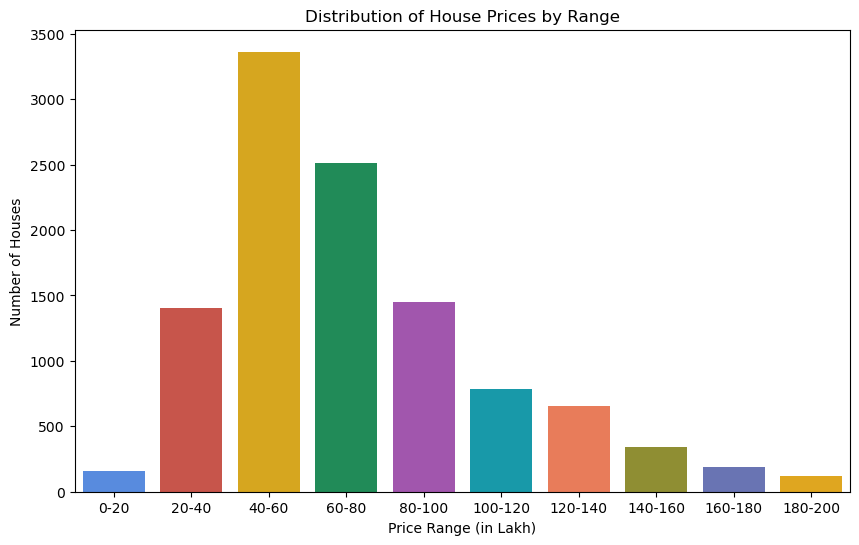

In [250]:

# Defining bin edges  for 10 labels
bins = np.arange(0, 220, 20)  

# Assigning labels to each bin (10 labels)
labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140', '140-160', '160-180', '180-200']

# Creating a new column 'price_range' to categorize data into bins
data['price_range'] = pd.cut(data['price'], bins=bins, labels=labels, right=False)

# Counting the number of houses in each price range
price_range_counts = data['price_range'].value_counts().sort_index()

# Defining Google-style colors for the boxes
google_colors = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58', '#AB47BC', '#00ACC1', '#FF7043', '#9E9D24', '#5C6BC0', '#FFB300']

# Plotting the bar plot with separate colors for each price range
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette=google_colors[:len(price_range_counts)])

# Adding labels and title
plt.title('Distribution of House Prices by Range')
plt.xlabel('Price Range (in Lakh)')
plt.ylabel('Number of Houses')

# Display the plot
plt.show()


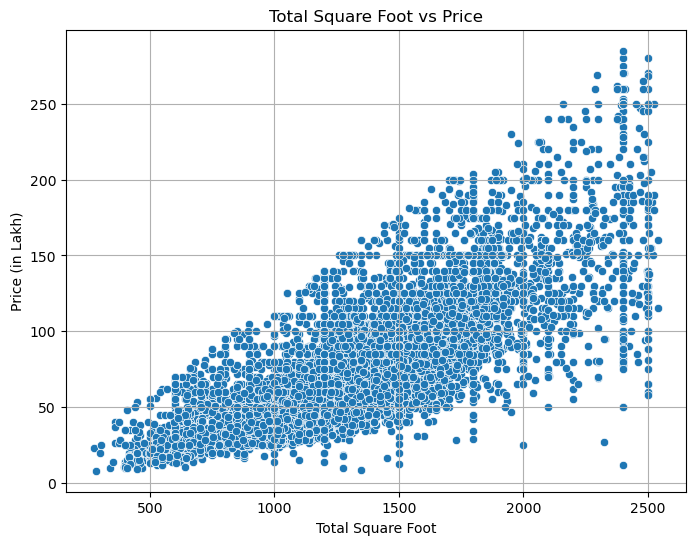

In [251]:
# Scatter plot of total square foot vs price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='price', data=data)
plt.title('Total Square Foot vs Price')
plt.xlabel('Total Square Foot')
plt.ylabel('Price (in Lakh)')
plt.grid(True)
plt.show()


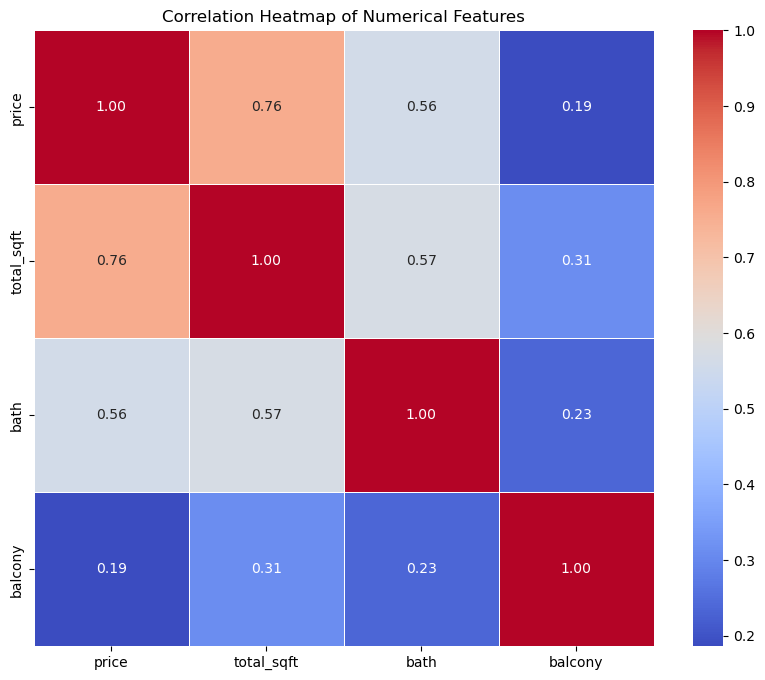

In [252]:
# Heatmap to display correlation between numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = data[['price', 'total_sqft', 'bath', 'balcony']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


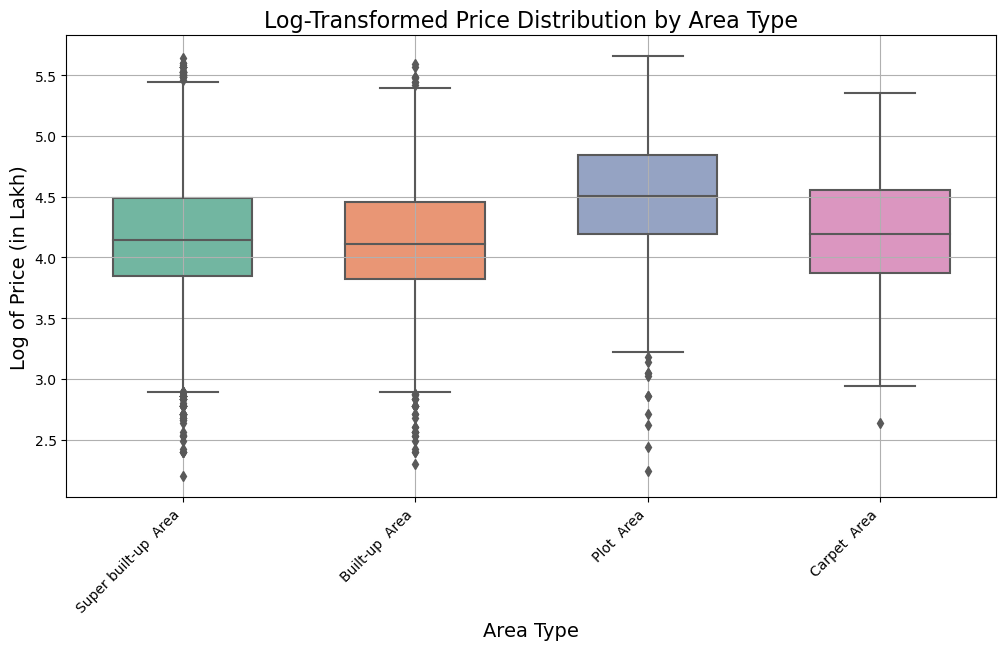

In [253]:
# Apply log transformation to the price column for better visualisation
data['log_price'] = np.log1p(data['price'])  

# Improved boxplot with log-transformed prices
plt.figure(figsize=(12, 6))

# Boxplot with log-transformed prices
sns.boxplot(x='area_type', y='log_price', data=data, palette='Set2', width=0.6)

plt.title('Log-Transformed Price Distribution by Area Type', fontsize=16)
plt.xlabel('Area Type', fontsize=14)
plt.ylabel('Log of Price (in Lakh)', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.show()


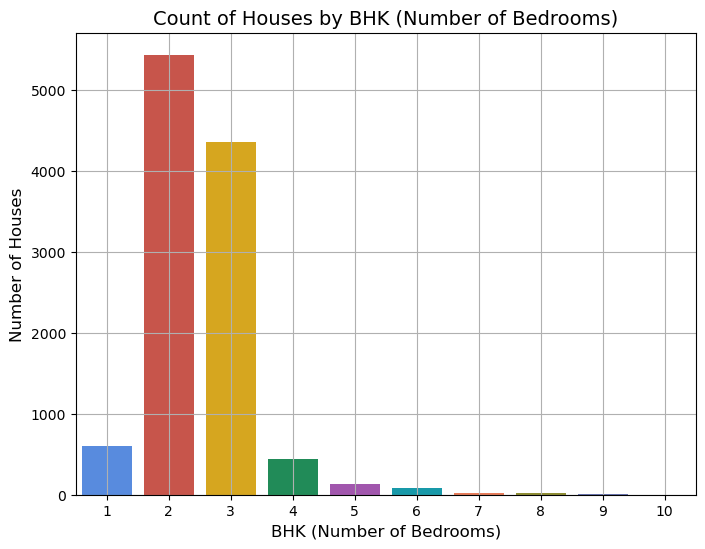

In [254]:
# Defining Google-style colors
google_colors = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58', '#AB47BC', '#00ACC1', '#FF7043', '#9E9D24', '#5C6BC0', '#FFB300']

# Bar plot for count of houses by number of bedrooms (BHK) with Google colors
plt.figure(figsize=(8, 6))
sns.countplot(x='bhk', data=data, palette=google_colors)

plt.title('Count of Houses by BHK (Number of Bedrooms)', fontsize=14)
plt.xlabel('BHK (Number of Bedrooms)', fontsize=12)
plt.ylabel('Number of Houses', fontsize=12)
plt.grid(True)

# Display the plot
plt.show()


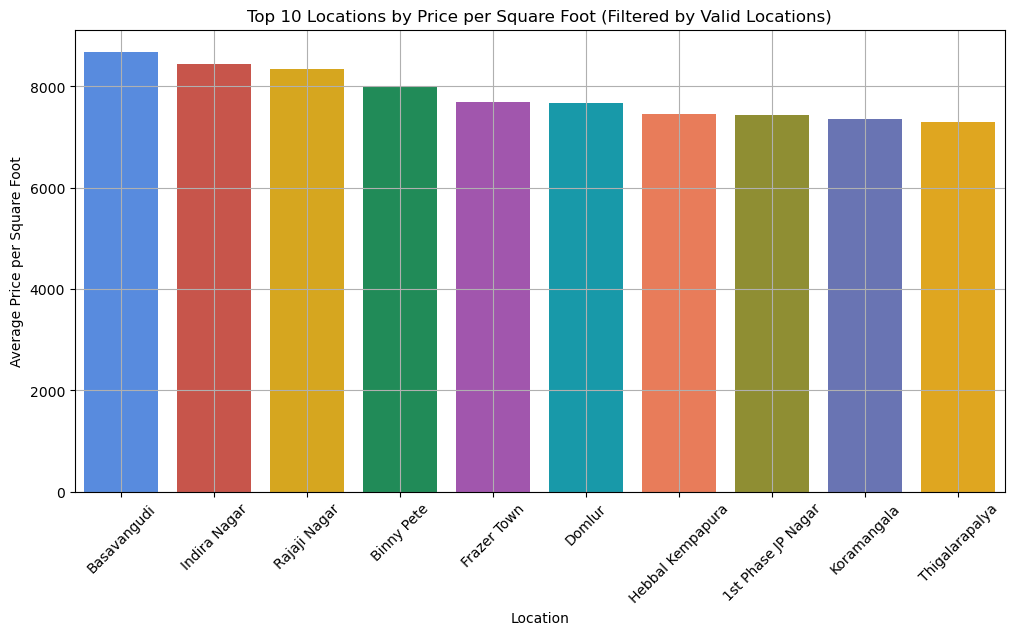

In [255]:
# Inspecting locations with their counts
location_counts = data['location'].value_counts()

# Grouping by location and calculating the average price per square foot
# Only select locations that have a significant number of entries (e.g., more than 10 houses)
valid_locations = location_counts[location_counts > 10].index
data = data[data['location'].isin(valid_locations)]

# Recalculate the top 10 locations with the highest price per square foot
location_price_per_sqft = data_filtered.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False).head(10)

# Step 4: Plotting the top 10 locations with the highest price per square foot
plt.figure(figsize=(12, 6))

# Defining Google-style colors for the bars
google_colors = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58', '#AB47BC', '#00ACC1', '#FF7043', '#9E9D24', '#5C6BC0', '#FFB300']

sns.barplot(x=location_price_per_sqft.index, y=location_price_per_sqft.values, palette=google_colors)
plt.title('Top 10 Locations by Price per Square Foot (Filtered by Valid Locations)')
plt.xlabel('Location')
plt.ylabel('Average Price per Square Foot')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


I have filtered out locations with less than 10 entries because it can distort results and add less meaning if not filtered


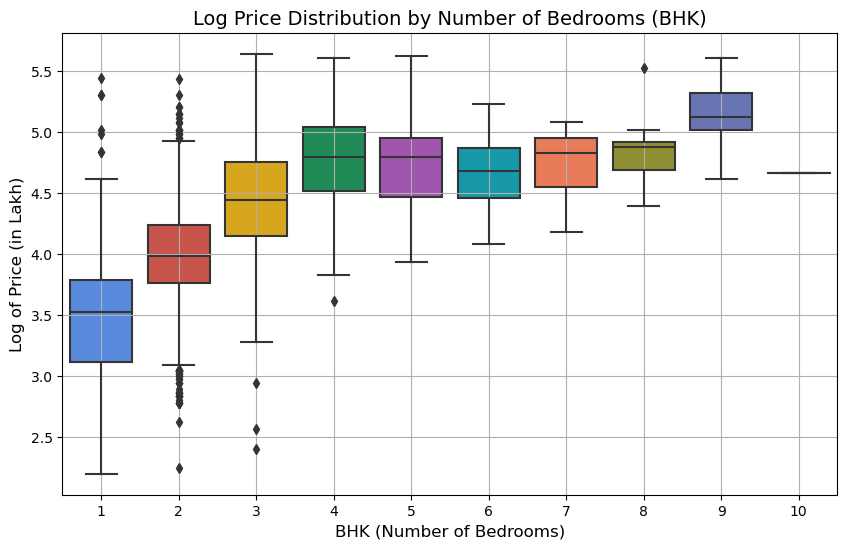

In [256]:
import numpy as np

# Defining Google-style colors
google_colors = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58', '#AB47BC', '#00ACC1', '#FF7043', '#9E9D24', '#5C6BC0', '#FFB300']

# Applying log transformation to the price column
data['log_price'] = np.log1p(data['price']) 

# Boxplot of log-transformed price vs BHK with Google colors
plt.figure(figsize=(10, 6))
sns.boxplot(x='bhk', y='log_price', data=data, palette=google_colors)

plt.title('Log Price Distribution by Number of Bedrooms (BHK)', fontsize=14)
plt.xlabel('BHK (Number of Bedrooms)', fontsize=12)
plt.ylabel('Log of Price (in Lakh)', fontsize=12)
plt.grid(True)

# Display the plot
plt.show()


#### Applying one-hot encoding to categorical columns and splitting data into test and train data

In [257]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Selecting the relevant features for the model
X = data[['total_sqft', 'bath', 'balcony', 'area_type', 'location']]  # Features
y = data['price']  # Target variable

# Applying OneHotEncoding to categorical columns (area_type and location)
column_transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), ['area_type', 'location'])], remainder='passthrough')

# Encoding the categorical features
X_encoded = column_transformer.fit_transform(X)

# Splitting the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Verifying the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


X_train shape: (6081, 210), X_test shape: (2607, 210)


Mean Squared Error: 375.5329118627088
R-squared: 0.729433993951371
Mean Absolute Error (MAE): 14.054610852135916


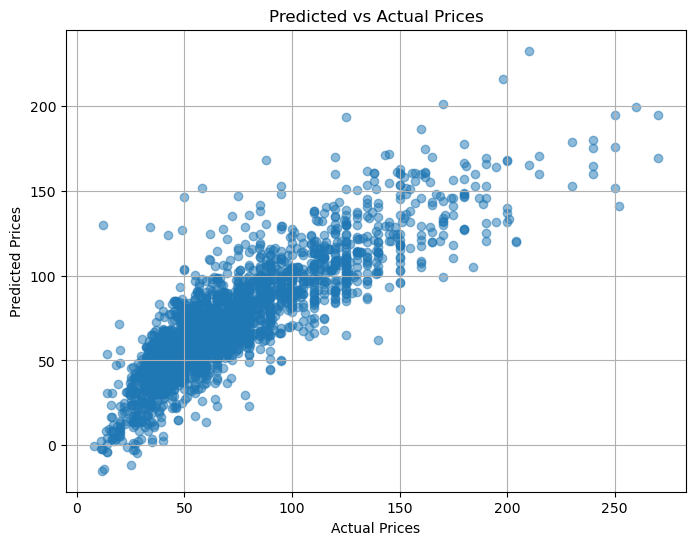

In [258]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f"Mean Absolute Error (MAE): {mae}")

# Visualize Predicted vs Actual Prices
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()


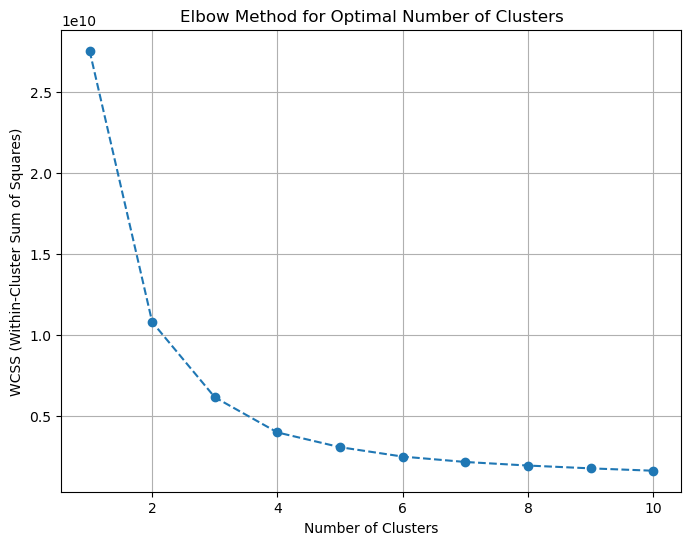

In [259]:

# Calculate the Within-Cluster Sum of Squares for different numbers of clusters
wcss = []
X_clustering = data[['price_per_sqft', 'total_sqft']]

# Testing for clusters from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_clustering)
    wcss.append(kmeans.inertia_) 
    
# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


Based on Elbow method for optimal number of clusters, we will use 2 clusters for K-Means

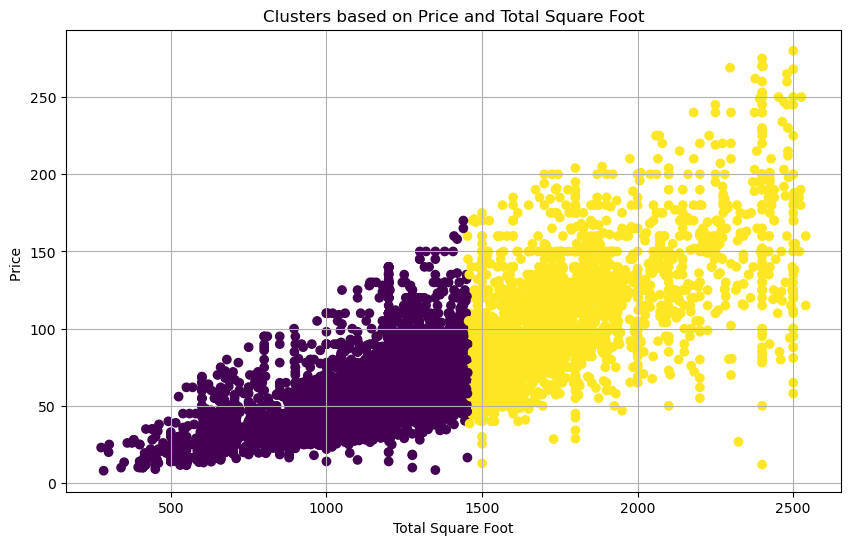

In [260]:
# Clustering based on 'price_per_sqft' and 'total_sqft'
X_clustering = data[['price', 'total_sqft']]

# Initialize the KMeans model with 2 clusters 
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_clustering)

# Add the cluster labels to the data
data['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['total_sqft'], data['price'], c=data['cluster'], cmap='viridis')
plt.title('Clusters based on Price and Total Square Foot')
plt.xlabel('Total Square Foot')
plt.ylabel('Price ')
plt.grid(True)
plt.show()




In [261]:
# Analyzing the average price per square foot for each cluster
cluster_analysis = data.groupby('cluster')['price_per_sqft'].mean()
print("Average Price per Square Foot for each cluster:")
print(cluster_analysis)

# Checking the size of the clusters
cluster_size = data['cluster'].value_counts()
print("\nNumber of properties in each cluster:")
print(cluster_size)

# Another way to present the same data
cluster_avg_price = data.groupby('cluster')['price_per_sqft'].mean()
cluster_size = data['cluster'].value_counts()

print("\nCluster 0: Average Price per Square Foot = {:.2f}, Number of Properties = {}".format(cluster_avg_price[0], cluster_size[0]))
print("Cluster 1: Average Price per Square Foot = {:.2f}, Number of Properties = {}".format(cluster_avg_price[1], cluster_size[1]))



Average Price per Square Foot for each cluster:
cluster
0    5012.934532
1    6075.143260
Name: price_per_sqft, dtype: float64

Number of properties in each cluster:
0    6075
1    2613
Name: cluster, dtype: int64

Cluster 0: Average Price per Square Foot = 5012.93, Number of Properties = 6075
Cluster 1: Average Price per Square Foot = 6075.14, Number of Properties = 2613


### Running RFE-based Linear Regression

In [262]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the linear regression model for RFE
# We will use Linear Regression as the base model to perform Recursive Feature Elimination (RFE)
model_rfe = LinearRegression()

# Initialize RFE with the model and specify the number of features to select
# We choose to keep 10 most important features.
rfe = RFE(estimator=model_rfe, n_features_to_select=10)

# Fitting RFE to the training data
rfe.fit(X_train, y_train)

# Extracting the feature names from the ColumnTransformer
feature_names = column_transformer.get_feature_names_out()

#Displaying the selected features by RFE
selected_features = feature_names[rfe.support_]
print(f"Selected Features by RFE: {selected_features}")

# Transforming the data to only include the selected features
# X_rfe_train = rfe.transform(X_train)
X_rfe_test = rfe.transform(X_test)

# Train the model using only the selected features
rfe_model = LinearRegression()
rfe_model.fit(X_rfe_train, y_train)

# Predicting on the test set
y_rfe_pred = rfe_model.predict(X_rfe_test)

# Evaluating the model's performance
# The performance is evaluated using the same metrics: MAE, MSE, and R-squared
mae_rfe = mean_absolute_error(y_test, y_rfe_pred)
mse_rfe = mean_squared_error(y_test, y_rfe_pred)
r2_rfe = r2_score(y_test, y_rfe_pred)

# Displaying the results with explanations
print("Evaluation Metrics for RFE-based Linear Regression Model:")
print(f"Mean Absolute Error (MAE): {mae_rfe:.2f} - The average error between predicted and actual prices.")
print(f"Mean Squared Error (MSE): {mse_rfe:.2f} - Penalizes larger errors more than MAE, emphasizing extreme errors.")
print(f"R-squared (R²): {r2_rfe:.4f} - Explains how well the model captures variance in house prices (closer to 1 is better).")


Selected Features by RFE: ['encoder__location_Basavangudi' 'encoder__location_Frazer Town'
 'encoder__location_Hebbal Kempapura' 'encoder__location_Hosakerehalli'
 'encoder__location_Iblur Village' 'encoder__location_Indira Nagar'
 'encoder__location_Koramangala' 'encoder__location_Rajaji Nagar'
 'encoder__location_Thigalarapalya' 'encoder__location_Ulsoor']
Evaluation Metrics for RFE-based Linear Regression Model:
Mean Absolute Error (MAE): 27.13 - The average error between predicted and actual prices.
Mean Squared Error (MSE): 1305.48 - Penalizes larger errors more than MAE, emphasizing extreme errors.
R-squared (R²): 0.0594 - Explains how well the model captures variance in house prices (closer to 1 is better).


### Running Polynomial Regression

In [263]:
from sklearn.preprocessing import PolynomialFeatures

# Generating Polynomial Features (degree 2)
# Polynomial features are created to capture non-linear relationships between the features and the target variable (price).
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transforming the training and testing data to include polynomial terms
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Training the Polynomial Regression Model
# Linear regression model is applied to the polynomial-transformed data to model non-linear relationships.
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predicting the Test Set Results
# Using the trained model to predict house prices for the test set
y_poly_pred = poly_model.predict(X_poly_test)

# Evaluating the Model Performance
# Evaluating the polynomial regression model with MAE, MSE, and R-squared metrics
mae_poly = mean_absolute_error(y_test, y_poly_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

# Printing the evaluation metrics with explanations
print("Evaluation Metrics for Polynomial Regression Model (Degree 2):")
print(f"Mean Absolute Error (MAE): {mae_poly:.2f} - Represents the average difference between predicted and actual prices.")
print(f"Mean Squared Error (MSE): {mse_poly:.2f} - Penalizes larger errors, giving more weight to extreme differences.")
print(f"R-squared (R²): {r2_poly:.4f} - Indicates how well the model explains the variance in the house prices (closer to 1 is better).")



Evaluation Metrics for Polynomial Regression Model (Degree 2):
Mean Absolute Error (MAE): 13.44 - Represents the average difference between predicted and actual prices.
Mean Squared Error (MSE): 357.30 - Penalizes larger errors, giving more weight to extreme differences.
R-squared (R²): 0.7426 - Indicates how well the model explains the variance in the house prices (closer to 1 is better).


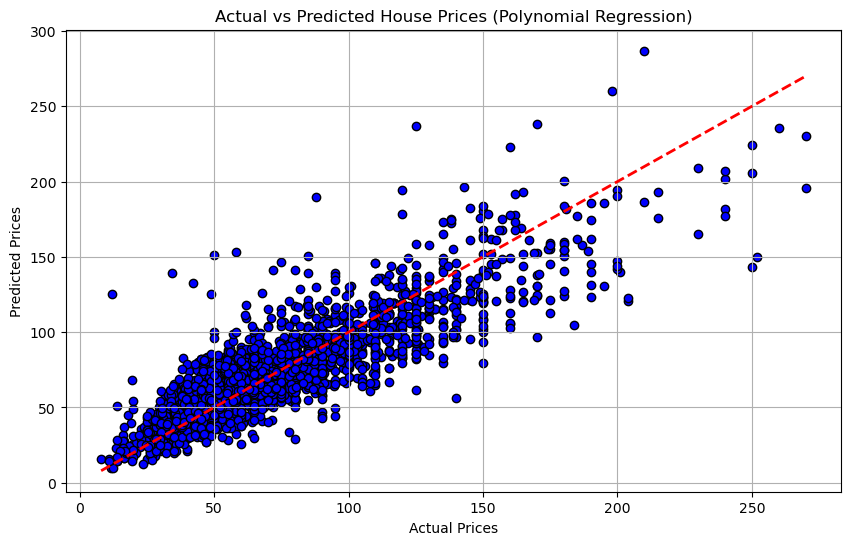

In [264]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted prices using Polynomial Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_poly_pred, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted House Prices (Polynomial Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()


Polynomial Regression is better model as compared to RFE as it has lower MAE and MSE scores. Also, it explains a comparitively higher proportion of the variance in the data (R²). As a result, Polynomial Regression is preferred for predicting house prices in this analysis.